<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Georgia&display=swap" rel="stylesheet">

<div style="text-align:center; margin-top:40px;">
  <span style="
    color:#568203;
    font-family:Georgia, serif;
    font-size:42px;
    font-weight:bold;
    text-shadow: 1px 1px 3px #aaa;
    letter-spacing: 2px;">
    Credit Card Fraud Detection 💳
  </span>
</div>

<div style="text-align:center; margin-top:40px;">
    <img src="../docs/images/credit-card-fraud-detection.webp" 
         style="max-width:80%; border-radius:10px; box-shadow: 0 4px 12px rgba(0,0,0,0.3);">
</div>

# 📚 Table of Contents

1. 📖 [Introduction](#introduction)
2. 🧰 [Import Libraries](#import-libraries)
3. 📂 [Import Dataset](#import-dataset)
4. 🧠 [Understanding the Data](#understanding-the-data)
5. 📊 [Data Visualization](#data-visualization)
6. 🧼 [Data Preprocessing](#data-preprocessing)
7. 🤖 [Model Train](#model-train)
8. 🧪 [Model Evaluation](#model-evaluation)
9. 💾 [Save Model](#save-model)
10. 📚 [References](#references)


---
<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 Introduction 🧠 <a name='introduction'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Introduction 📖
    </h1>
</div>

**📌 Project Overview**
This project aims to build a **machine learning model** that automatically detects **fraudulent credit card transactions** from a large dataset of legitimate transactions.  

Fraud detection is a **binary classification problem**, where each transaction is classified as:  
- ✅ **Legitimate (Class 0)**  
- ❌ **Fraudulent (Class 1)**  

> ⚠️ Challenge: Fraudulent transactions are extremely rare, creating a **highly imbalanced dataset**.

---

**🔍 Workflow**

**1️⃣ Data Preprocessing**
- Clean the raw dataset (features: `Time`, `Amount`, `V1–V28`).  
- Handle missing values and scale numerical features.  

**2️⃣ Exploratory Data Analysis (EDA)**
- Visualize feature distributions for legitimate vs fraudulent transactions.  
- Examine correlations and anomalies.  
- Understand the class imbalance visually.  

**3️⃣ Handling Class Imbalance**
- Oversampling (e.g., **SMOTE**)  
- Undersampling  
- Algorithmic approaches (e.g., **Isolation Forest**)  

**4️⃣ Model Training**
- Models: Logistic Regression, Decision Trees, Random Forest, XGBoost  
- Goal: Learn patterns that distinguish fraud from legitimate transactions  

**5️⃣ Evaluation**
- Metrics suitable for imbalanced datasets:  
  - **Precision** ✅  
  - **Recall** 🔄  
  - **F1-Score** ⚖️  
- High recall is prioritized to **minimize missed frauds**.

---

💡 **Why This Project Matters**
- Protect customers from financial loss  
- Reduce financial risk for banks and credit card companies  
- Build trust in secure financial systems  

---

🎯 **Project Goals**
- Build a **robust ML model** for fraud detection  
- Achieve **high recall**, even if some false positives occur  
- Gain insights through **EDA**  
- Compare different **modeling techniques**  
- Establish a **reusable workflow** for future projects  

---

📂 **Dataset Overview**
- **Rows:** 284,807  
- **Fraud Cases:** 492 (~0.17%)  
- **Features:** `Time`, `Amount`, `V1–V28`  
- **Target:** `Class` (0 = legit, 1 = fraud)  

> ⚠️ Note: Accuracy alone is **not reliable** due to class imbalance.


---

<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;"> 🚨 Import Libraries � <a name='import-libraries'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Import Libraries 🧰
    </h1>
</div>

## Import Basic Manipulation and Visualization Libraries

In [28]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import System and OS libraries

In [127]:
# Import Custom Libraries
import sys
import os

# Save the original sys.path
original_sys_path = sys.path.copy()

# Modify sys.path
sys.path.append('../src')
from cyclical_transformer import CyclicalTimeTransformer
from drop_columns import ColumnDropper

# Reset to original
sys.path = original_sys_path.copy()

## Import Scikit-Learn

In [128]:
# Transformer and Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Imbalace Dataset
from imblearn.over_sampling import SMOTE

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Metrices
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Import Pickle
import pickle

---

<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;"> 🚨 Import Dataset 📂 <a name='import-dataset'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Import Dataset 📂
    </h1>
</div>

In [31]:
try:
    df = pd.read_csv('../data/raw/creditcard.csv')
    print('Data Successfully read ✅')
except FileNotFoundError:
    print("Error: data not found. ❌")
    exit()

Data Successfully read ✅


<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 Understanding The Data 🧠 <a name='understanding-the-data'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Understanding The Data 🧠
    </h1>
</div>

In [32]:
df.shape

(284807, 31)

In [33]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [35]:
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
df.isnull().sum().sum()

np.int64(0)

In [38]:
df.duplicated().sum()

np.int64(1081)

In [39]:
print('Describe the Dataset')
df.describe().T

Describe the Dataset


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [40]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [41]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [42]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

## Observation

### Columns
---
**1. Time**

* Represents the number of **seconds elapsed** between each transaction and the first transaction in the dataset.
* Useful for identifying **time-based patterns** or trends, even though exact timestamps are anonymized.

---

**2. V1 – V28 (PCA Components)**

* These are **anonymized features** generated using **Principal Component Analysis (PCA)**.
* Original features (like transaction type, merchant info, or location) were transformed for privacy.
* Each column (V1, V2, … V28) is a **numeric component** that captures variance in the original data.
* These are the **main predictive features** for detecting fraud.

**Why V1–V28 exist**

* The original dataset contained sensitive information about transactions, such as:

  * Merchant ID
  * Transaction type
  * Customer details
  * Location data
* To **protect privacy**, these original features were transformed so that the raw information cannot be reconstructed.

---
💡 **Summary:**

> V1–V28 are transformed, anonymized features derived from PCA, which represent the original transaction attributes in a way that preserves patterns while protecting privacy. They are the main features used to train fraud detection models.

---

**3. Amount**

* The **transaction amount** in the original currency.
* Unlike PCA features, this is **not transformed**.
* Distribution is often highly skewed, so **scaling or normalization** may be necessary for modeling.

---

**4. Class**

* The **target variable** for the machine learning model.
* Binary encoding:

  * `0` → Legitimate transaction
  * `1` → Fraudulent transaction
* This column highlights the **class imbalance**, as fraudulent transactions are rare.

---

**Summary Table**
| Column | Data Type | Role        | Description / Preprocessing Notes |
|--------|-----------|------------|----------------------------------|
| Time   | Numeric   | Feature    | Seconds elapsed since first transaction. Can be used to analyze time-based patterns. May require scaling. |
| V1-V28 | Numeric   | Feature    | Principal Components from PCA. Original features anonymized. Core predictors for fraud detection. |
| Amount | Numeric   | Feature    | Transaction amount in original currency. Highly skewed; scaling or normalization recommended. |
| Class  | Binary    | Target     | 0 = Legitimate, 1 = Fraudulent. Represents the class imbalance in the dataset. |

---


---

<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 Understanding The Data 🧠 <a name='data-visualization'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Data Visualization 📊
    </h1>
</div>

## `Class`

Class
0    284315
1       492
Name: count, dtype: int64


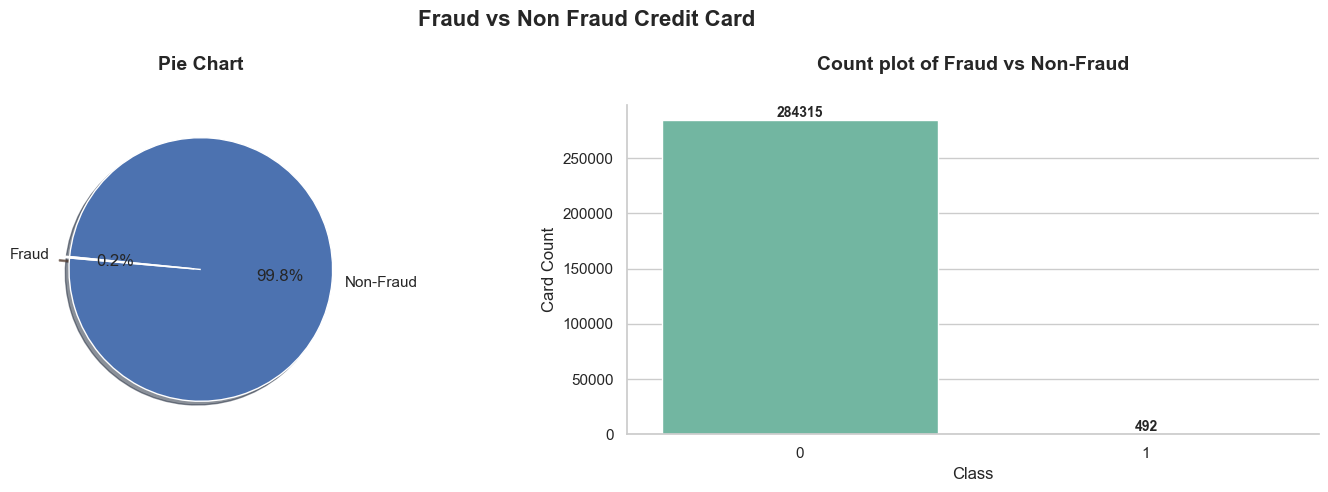

In [43]:
# Fraud vs Non Fraud
frd_counts = df['Class'].value_counts()
print(frd_counts)

# Sub Plot make
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))

# Create Pie Chart
ax[0].pie(
    frd_counts,
    labels=['Non-Fraud', 'Fraud'],
    autopct='%1.1f%%',
    startangle=175,
    explode=(0, 0.05),
    shadow=True
)
ax[0].set_title("Pie Chart", weight="bold", fontsize=14, pad=25)

# Use a valid Seaborn color palette
palette = sns.color_palette("Set2", n_colors=2)

# Count Plot
sns.countplot(data=df, x="Class", palette=palette, ax=ax[1])
ax[1].set_title("Count plot of Fraud vs Non-Fraud", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Card Count")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.suptitle('Fraud vs Non Fraud Credit Card', weight="bold", fontsize=16)
plt.tight_layout()


## `Amount`

In [44]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [45]:
min_transaction_counts = len(df[df['Amount'] == df['Amount'].min()])
max_transaction_counts = len(df[df['Amount'] == df['Amount'].max()])

print(f'Minimum Transaction - {df['Amount'].min()}\nCard Counts - {min_transaction_counts}')
print(f'\nMaximum Transaction - {df['Amount'].max()} \nCard Counts - {max_transaction_counts}')

Minimum Transaction - 0.0
Card Counts - 1825

Maximum Transaction - 25691.16 
Card Counts - 1


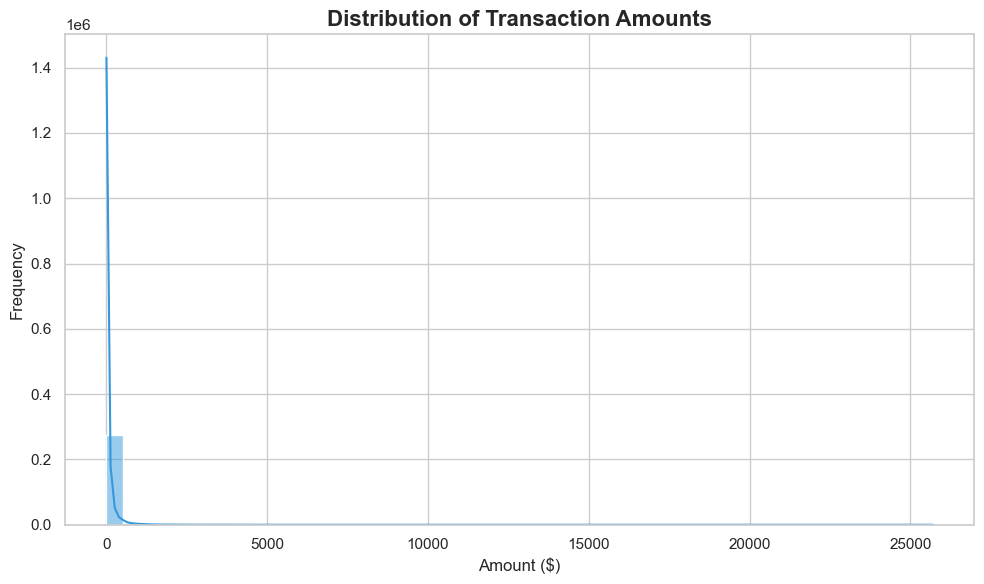

In [46]:
# Set style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', bins=50, kde=True, color='#3498db')

# Customize
plt.title('Distribution of Transaction Amounts', fontsize=16, weight='bold')
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

plt.show()


In [47]:
dfx = df.copy()
# Define bins and labels
bins = [0, 10, 100, 1000, 5000, 10000, 26000]
labels = ['Micro', 'Low', 'Medium', 'High', 'Very High', 'Extreme']

# Create new column
dfx['Amount_Category'] = pd.cut(df['Amount'], bins=bins, labels=labels, include_lowest=True)

# Preview
print(dfx['Amount_Category'].value_counts())

Amount_Category
Low          128035
Micro        100264
Medium        53568
High           2885
Very High        48
Extreme           7
Name: count, dtype: int64


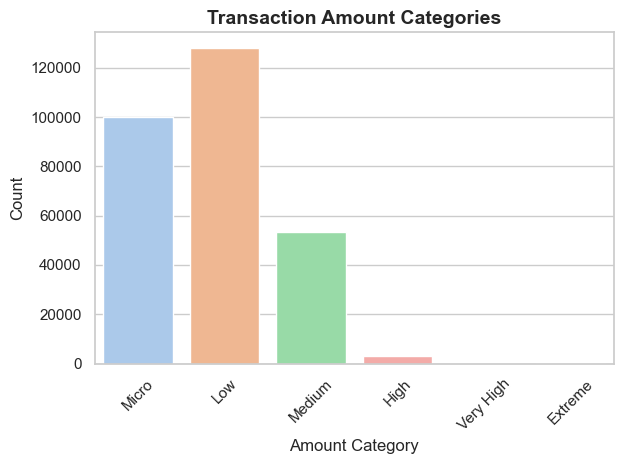

In [48]:
sns.countplot(data=dfx, x='Amount_Category', palette='pastel')
plt.title('Transaction Amount Categories', fontsize=14, weight='bold')
plt.xlabel('Amount Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  Amount_Category  Count
0           Micro    249
1          Medium    121
2             Low    113
3            High      9
4       Very High      0
5         Extreme      0


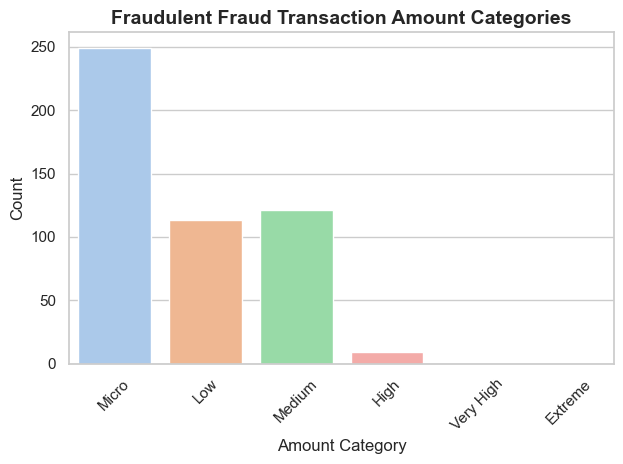

In [49]:
# Get fraud-only amount category counts
frd_amnt_cnt = dfx[dfx['Class'] == 1]['Amount_Category'].value_counts().reset_index()
frd_amnt_cnt.columns = ['Amount_Category', 'Count']
print(frd_amnt_cnt)

# Plot
sns.barplot(data=frd_amnt_cnt, x='Amount_Category', y='Count', palette='pastel')
plt.title('Fraudulent Fraud Transaction Amount Categories', fontsize=14, weight='bold')
plt.xlabel('Amount Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## `Time`

In [50]:
dfx['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [51]:
min_time_counts = len(df[df['Time'] == df['Time'].min()])
max_time_counts = len(df[df['Time'] == df['Time'].max()])

print(f'Minimum Time - {df['Time'].min()}\nCard Counts - {min_time_counts}')
print(f'\nMaximum Time - {df['Time'].max()} \nCard Counts - {max_time_counts}')

Minimum Time - 0.0
Card Counts - 2

Maximum Time - 172792.0 
Card Counts - 1


In [52]:
df['Time'].max()/(60*60)

np.float64(47.99777777777778)

In [53]:
df.tail(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.41465,0.48618,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0


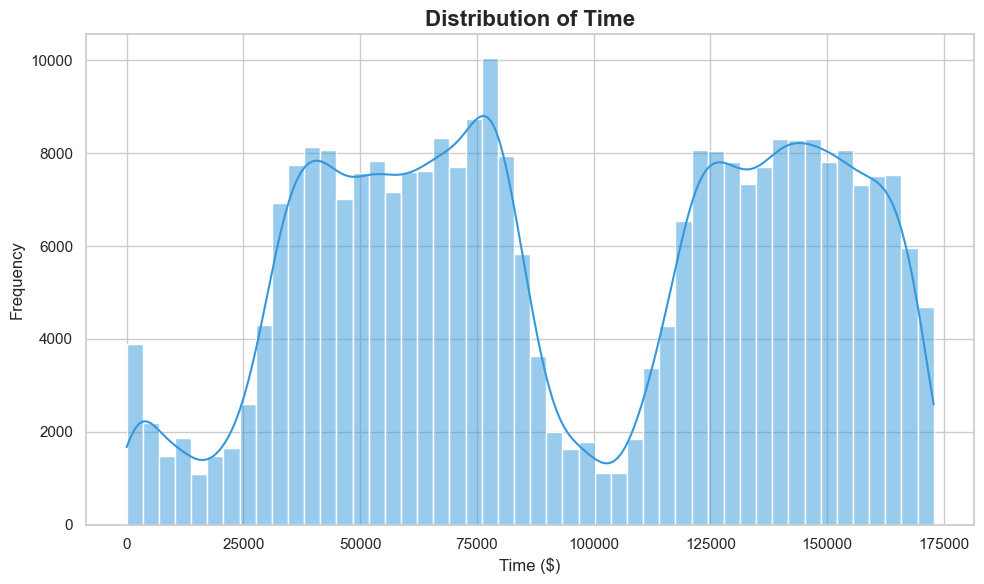

In [54]:
# Set style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', bins=50, kde=True, color='#3498db')

# Customize
plt.title('Distribution of Time', fontsize=16, weight='bold')
plt.xlabel('Time ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

plt.show()


In [55]:
# Define function to categorize time into bins
def categorize_time_of_day(seconds):
    if 0 <= seconds <= 21600:
        return 'Early Morning (12AM–6AM)'
    elif 21601 <= seconds <= 43200:
        return 'Morning (6AM–12PM)'
    elif 43201 <= seconds <= 64800:
        return 'Afternoon (12PM–6PM)'
    elif 64801 <= seconds <= 86400:
        return 'Evening (6PM–12AM)'
    elif 86401 <= seconds <= 108000:
        return 'Next Day Early Morning'
    elif 108001 <= seconds <= 129600:
        return 'Next Day Morning'
    elif 129601 <= seconds <= 151200:
        return 'Next Day Afternoon'
    elif 151201 <= seconds <= 172792:
        return 'Next Day Evening'
    else:
        return 'Out of Range'

# Apply the function to create a new column
dfx['TimeOfDay'] = dfx['Time'].apply(categorize_time_of_day)

# Preview the result
dfx[['Time', 'TimeOfDay']].head()


,Time,TimeOfDay
0,0.0,Early Morning (12AM–6AM)
1,0.0,Early Morning (12AM–6AM)
2,1.0,Early Morning (12AM–6AM)
3,1.0,Early Morning (12AM–6AM)
4,2.0,Early Morning (12AM–6AM)


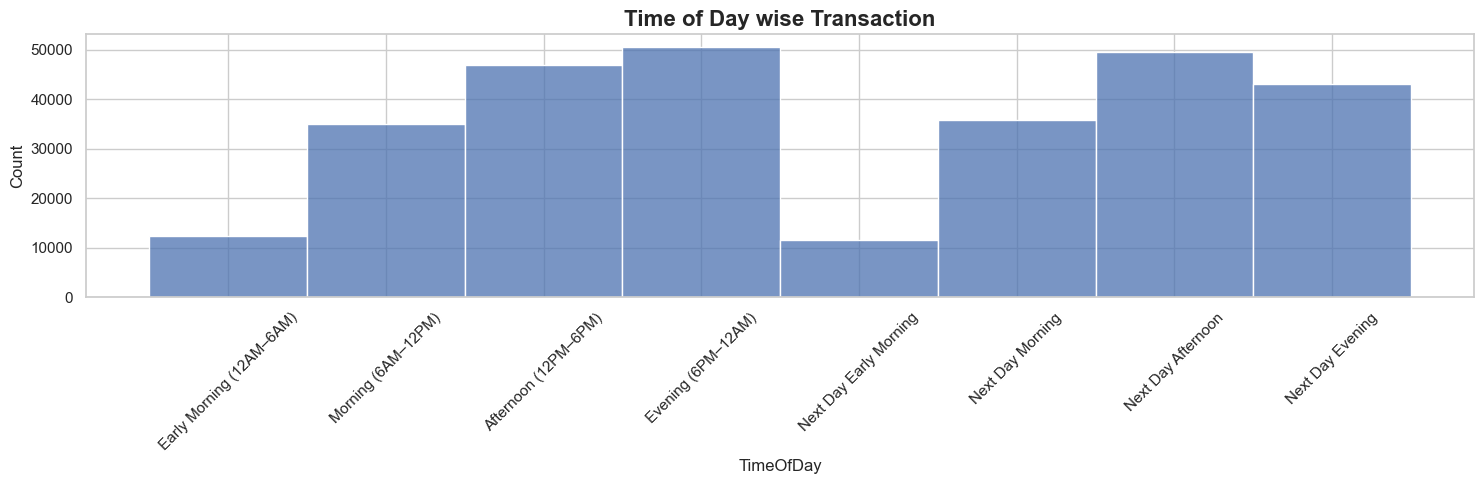

In [56]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data = dfx,
    x = 'TimeOfDay',
    palette = 'Set2'
)
plt.title('Time of Day wise Transaction', weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                  TimeOfDay  Count
0        Morning (6AM–12PM)     91
1      Afternoon (12PM–6PM)     71
2    Next Day Early Morning     69
3        Evening (6PM–12AM)     64
4        Next Day Afternoon     63
5  Early Morning (12AM–6AM)     55
6          Next Day Evening     52
7          Next Day Morning     27


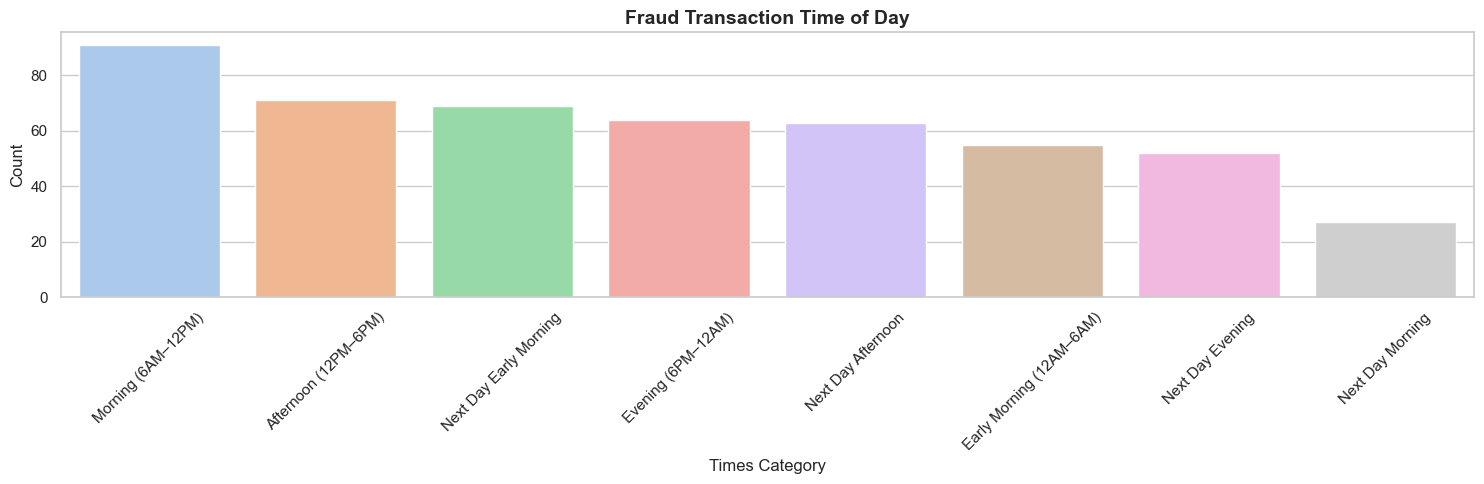

In [57]:
plt.figure(figsize=(15, 5))

# Get fraud-only amount category counts
frd_amnt_cnt = dfx[dfx['Class'] == 1]['TimeOfDay'].value_counts().reset_index()
frd_amnt_cnt.columns = ['TimeOfDay', 'Count']
print(frd_amnt_cnt)

# Plot
sns.barplot(data=frd_amnt_cnt, x='TimeOfDay', y='Count', palette='pastel')
plt.title('Fraud Transaction Time of Day', fontsize=14, weight='bold')
plt.xlabel('Times Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations
Here’s a concise observation for the **Class**, **Amount**, and **Time** features in a credit card fraud detection dataset:

---

**🔍 Feature Observations**

**🏷️ Class -**
- Binary label: `0` for legitimate transactions, `1` for fraudulent.
- Highly imbalanced—fraud cases typically represent less than 0.2% of the data.
- Requires careful handling (e.g., resampling or anomaly detection) to avoid biased models.

**💰 Amount -**
- Represents the transaction value in currency units.
- Fraudulent transactions can occur across all ranges, but often cluster at lower or unusually high amounts.
- Normalization or log transformation may help reduce skewness.

**⏰ Time -**
- Measured in seconds from the first transaction in the dataset.
- Useful for capturing temporal patterns—e.g., fraud spikes during off-hours.
- Often transformed into cyclical features (`Time_sin`, `Time_cos`) to reflect daily periodicity.

---
<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 Data Preprocessing 🧼 <a name='data-preprocessing'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Data Preprocessing 🧼
    </h1>
</div>

**Key aspects of data preprocessing:**
- **Data Cleaning:** Addressing missing values, handling outliers, and correcting inconsistencies in the data.
- **Data Transformation:** Converting data into a suitable format for analysis, such as scaling numerical features or encoding categorical variables.
- **Data Integration:** Combining data from multiple sources into a unified dataset.
- **Data Reduction:** Data Compression, Data Sampling, Feature Selection.

## Data Cleaning

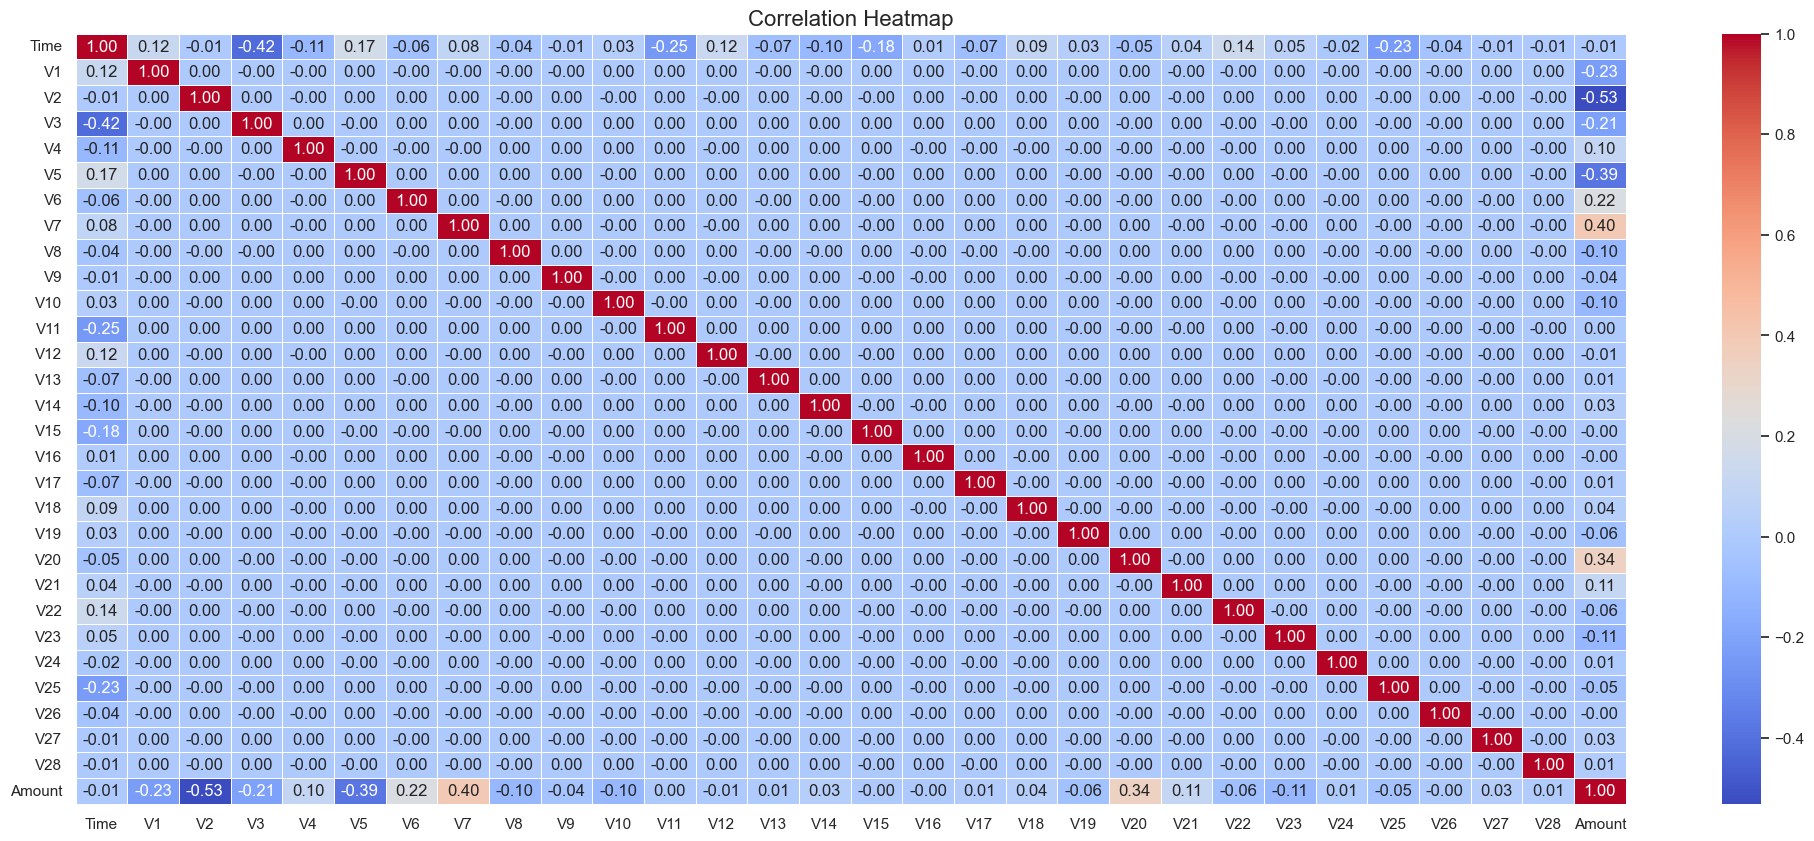

In [58]:
# Check Co Relation

corr_matrix = dfx.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

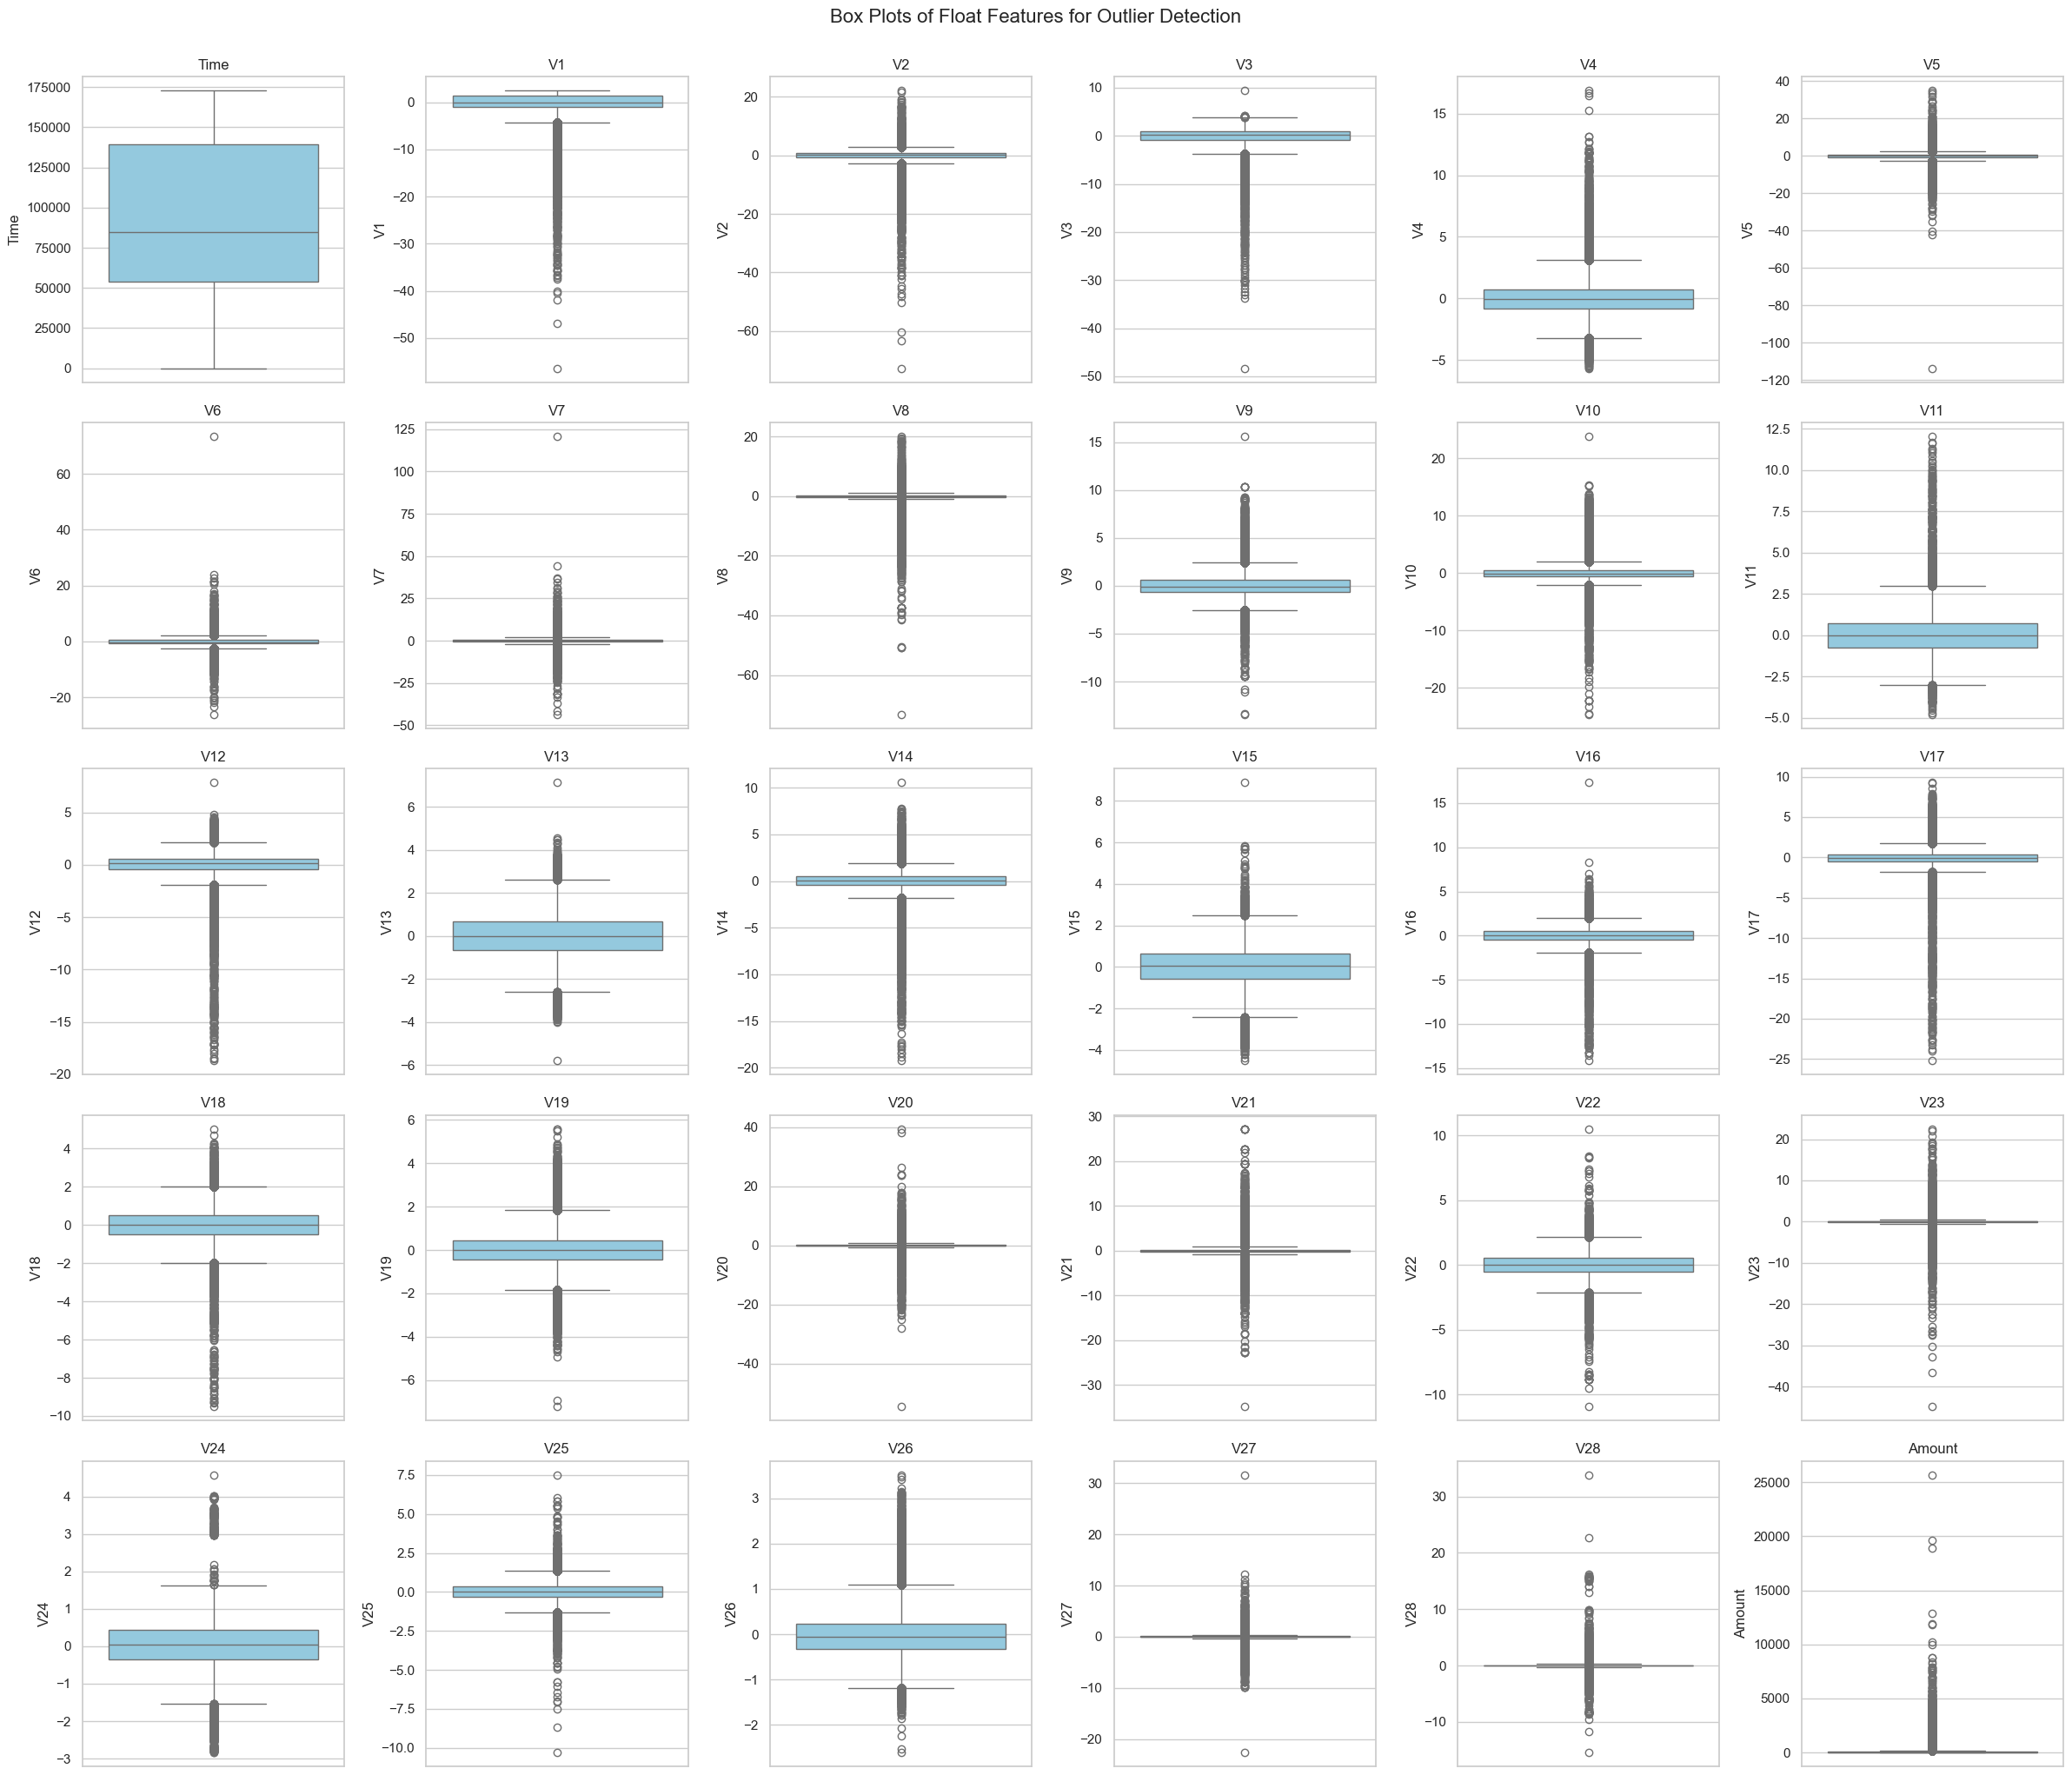

In [59]:
# Select float columns
float_col_name = dfx.select_dtypes(include=['float64']).columns.tolist()

# Set number of plots per row
plots_per_row = 6
total_plots = len(float_col_name)
rows = (total_plots + plots_per_row - 1) // plots_per_row  # Ceiling division

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row * 4, rows * 4))
axes = axes.flatten()  # Flatten to easily index

# Plot each box plot
for i, col in enumerate(float_col_name):
    sns.boxplot(y=dfx[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Box Plots of Float Features for Outlier Detection', fontsize=16, y=1.02)
plt.show()

### Outlier Removed

In [60]:
cols = float_col_name
total_outlier = []

# Start with full fraud_df
non_fraud_df = dfx[dfx['Class'] == 0]
df_ot = non_fraud_df.copy()

print('Total Outlier Detect\n----------------------')
for col in cols:
    Q1 = non_fraud_df[col].quantile(0.25)
    Q3 = non_fraud_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df_ot[(df_ot[col] < lower_bound) | (df_ot[col] > upper_bound)]
    total_outlier.append(len(outliers))

    # Remove outliers from df_ot cumulatively
    df_ot = df_ot[(df_ot[col] >= lower_bound) & (df_ot[col] <= upper_bound)]

    print(f"Number of outliers in '{col}': {len(outliers)}")

print(f'\n✅ Total Outliers Detected: {sum(total_outlier)}')
print(f'📉 Remaining Rows After Outlier Removal: {len(df_ot)}')


Total Outlier Detect
----------------------
Number of outliers in 'Time': 0
Number of outliers in 'V1': 6912
Number of outliers in 'V2': 7713
Number of outliers in 'V3': 635
Number of outliers in 'V4': 9608
Number of outliers in 'V5': 6883
Number of outliers in 'V6': 12511
Number of outliers in 'V7': 2287
Number of outliers in 'V8': 10879
Number of outliers in 'V9': 4338
Number of outliers in 'V10': 1867
Number of outliers in 'V11': 150
Number of outliers in 'V12': 9524
Number of outliers in 'V13': 1770
Number of outliers in 'V14': 5522
Number of outliers in 'V15': 1473
Number of outliers in 'V16': 4494
Number of outliers in 'V17': 782
Number of outliers in 'V18': 4375
Number of outliers in 'V19': 4250
Number of outliers in 'V20': 5951
Number of outliers in 'V21': 751
Number of outliers in 'V22': 80
Number of outliers in 'V23': 2738
Number of outliers in 'V24': 2301
Number of outliers in 'V25': 1268
Number of outliers in 'V26': 2856
Number of outliers in 'V27': 13923
Number of outliers

In [61]:
# Get all fraud cases (Class == 1)
fraud_df = dfx[dfx['Class'] == 1]

# Concatenate cleaned non-fraud with full fraud data
df_ot = pd.concat([df_ot, fraud_df], axis=0).reset_index(drop=True)
df_ot = df_ot.sample(frac=1, random_state=42).reset_index(drop=True)

print(f'🧾 Final Dataset Shape: {df_ot.shape}')
print(f'✅ Class Distribution:\n{df_ot["Class"].value_counts()}')

🧾 Final Dataset Shape: (146446, 33)
✅ Class Distribution:
Class
0    145954
1       492
Name: count, dtype: int64


In [62]:
df_ot.shape

(146446, 33)

### Save Dataset

In [63]:
filename = 'remove_outlier.csv'
path = f'../data/processed/{filename}'

try:
    # Ensure directory exists
    os.makedirs(os.path.dirname(path), exist_ok=True)

    # Export and overwrite
    df_ot.to_csv(path, index=False)
    print(f"✅ File successfully saved to: {path}")

except PermissionError:
    print("❌ Permission denied: Unable to write to the file. Please check file permissions.")

except FileNotFoundError:
    print("❌ Directory not found: Make sure the path exists or is correctly specified.")

except Exception as e:
    print(f"❌ Unexpected error occurred: {e}")


✅ File successfully saved to: ../data/processed/remove_outlier.csv


## Handle Imbalance Dataset and Split Dataset

In [64]:
X = df_ot.iloc[:, 0:30]
y = df_ot['Class']

In [65]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [66]:
y.value_counts(), y_resampled.value_counts()

(Class
 0    145954
 1       492
 Name: count, dtype: int64,
 Class
 0    145954
 1    145954
 Name: count, dtype: int64)

In [67]:
X_temp, X_test, y_temp, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [68]:
len(df.columns)

31

## Data Transformation

In [69]:
df_ot.drop(columns=['TimeOfDay', 'Time_mod_day', 'Time_sin', 'Time_cos'], inplace=True, errors='ignore')
df_ot.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Category'],
      dtype='object')

In [70]:
# Define column transformer to scale only 'Amount'
column_transformer = ColumnTransformer(
    transformers=[
        ('amount_scaler', StandardScaler(), ['Amount']),
        # ('imputer', SimpleImputer(strategy='mean'))
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

remove_features = ['Time', 'Amount_Category']

# Final pipeline
transformer_pipeline = Pipeline(
    steps=[
        ('time_transformer', CyclicalTimeTransformer(time_col='Time')),
        ('drop_columns', ColumnDropper(columns_to_drop=remove_features)),
        ('column_scaling', column_transformer)
    ]
)


## Data Integration

In [71]:
pass

## Data Reduction

In [72]:
df_ot.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Category
0,1309.0,-0.471181,1.031299,1.679189,-0.10340,-0.078651,-0.677402,0.640968,0.042290,-0.735608,...,-0.408931,-0.011838,0.528153,-0.236246,0.039611,0.264229,0.113890,3.99,0,Micro
1,70518.0,1.182439,0.058264,0.188419,0.56396,-0.217678,-0.348981,0.015311,0.045785,-0.010499,...,0.173522,-0.056393,0.280874,0.512693,0.556349,-0.043594,-0.012303,0.01,0,Micro


## Dataset Export

In [73]:
transformer_pipeline.fit(X_train, y_train)

Pipeline(steps=[('time_transformer', CyclicalTimeTransformer()),
                ('drop_columns',
                 ColumnDropper(columns_to_drop=['Time', 'Amount_Category'])),
                ('column_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('amount_scaler',
                                                  StandardScaler(),
                                                  ['Amount'])]))])

In [74]:
X_train_transformed = transformer_pipeline.transform(X_train)
X_val_transformed = transformer_pipeline.transform(X_val)

---
<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 Model Train 🤖 <a name='model-train'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Model Train 🤖
    </h1>
</div>


**🚀 Top Classification Models for Fraud Detection**

| Model | Why It Works Well | Tips |
|-------|-------------------|------|
| **Logistic Regression (with tweaks)** | Simple, interpretable | Add `class_weight='balanced'` and regularization |
| **Random Forest** | Handles non-linear patterns, robust to outliers | Use `class_weight='balanced'` or resample |
| **XGBoost** | Gradient boosting, great for tabular data | Set `scale_pos_weight` to balance classes |
| **SVC (Support Vector Classifier)** | Effective in high-dimensional spaces | Use `class_weight='balanced'`, try kernel tricks, scale data |
| **KNN (K-Nearest Neighbors)** | Non-parametric, intuitive | Normalize features, use small `k`, consider under-sampling |

## Utills

In [75]:
def plot_roc_auc(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)

    # Plotting the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

## Logistic Regression

In [76]:
# Train the model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_transformed, y_train)

# Predict on training and validation sets
y_train_pred1 = model1.predict(X_train_transformed)
y_val_pred1 = model1.predict(X_val_transformed)

# Evaluate accuracy
tacc1 = accuracy_score(y_train, y_train_pred1)
acc1 = accuracy_score(y_val, y_val_pred1)

print(f"📘 Train Accuracy: {tacc1:.4f}")
print(f"✅ Validation Accuracy: {acc1:.4f}")

📘 Train Accuracy: 0.9940
✅ Validation Accuracy: 0.9939


### Confusion Matrix

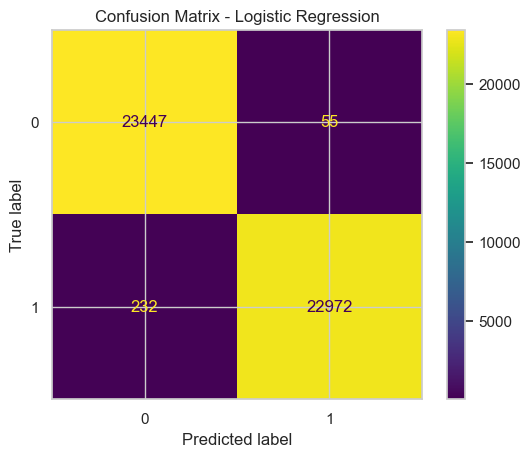

In [78]:
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred1)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Classification Report

In [79]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23502
           1       1.00      0.99      0.99     23204

    accuracy                           0.99     46706
   macro avg       0.99      0.99      0.99     46706
weighted avg       0.99      0.99      0.99     46706



### ROC-AUC Score

ROC AUC Score: 0.9994099575324337


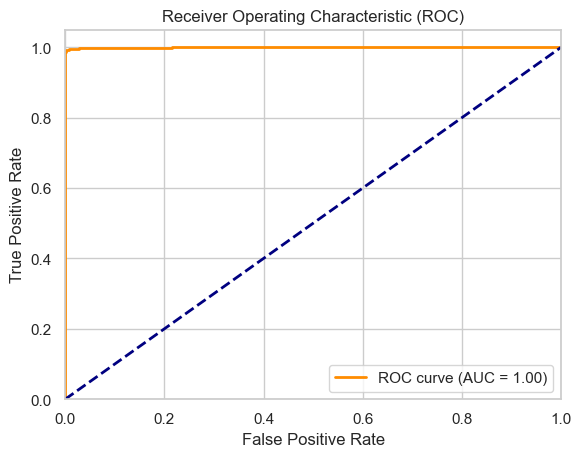

In [80]:
# Print ROC AUC Score
plot_roc_auc(model1, X_val_transformed, y_val)

## Decision Tree

In [81]:
model2 = DecisionTreeClassifier(max_depth=5)
model2.fit(X_train_transformed, y_train)

y_pred2 = model2.predict(X_val_transformed)
acc2 = accuracy_score(y_val, y_pred2)
print(f"✅ Validation Accuracy: {acc2:.4f}")

✅ Validation Accuracy: 0.9878


### Confusion Matrix

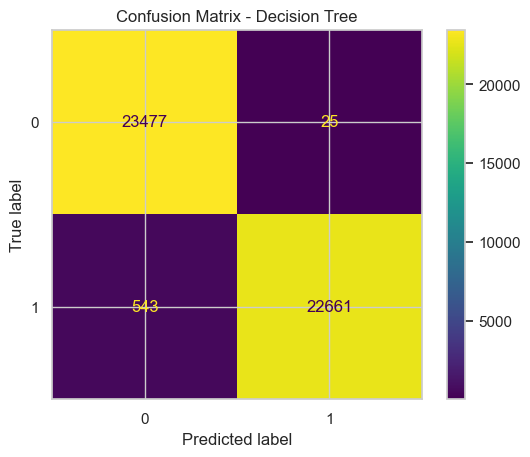

In [82]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred2)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### Classification Report

In [83]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     23502
           1       1.00      0.98      0.99     23204

    accuracy                           0.99     46706
   macro avg       0.99      0.99      0.99     46706
weighted avg       0.99      0.99      0.99     46706



### ROC-AUC Score

ROC AUC Score: 0.9882765115032518


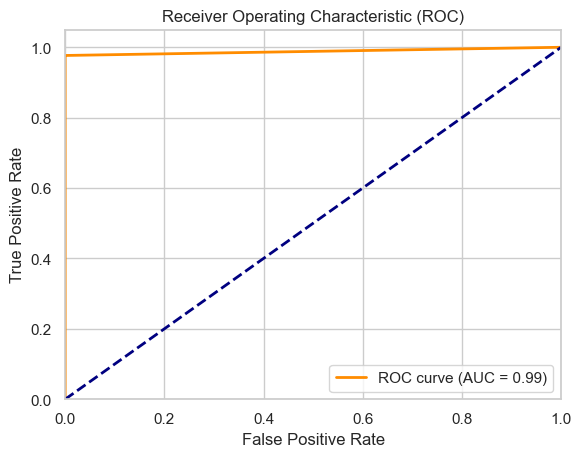

In [84]:
# Print ROC AUC Score
plot_roc_auc(model2, X_val_transformed, y_val)

## XGBoost

In [85]:
model3 = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=2.77,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model3.fit(X_train_transformed, y_train)

y_pred3 = model3.predict(X_val_transformed)
acc3 = accuracy_score(y_val, y_pred3)
print(f"✅ Validation Accuracy: {acc3:.4f}")

✅ Validation Accuracy: 1.0000


### Confusion Matrix

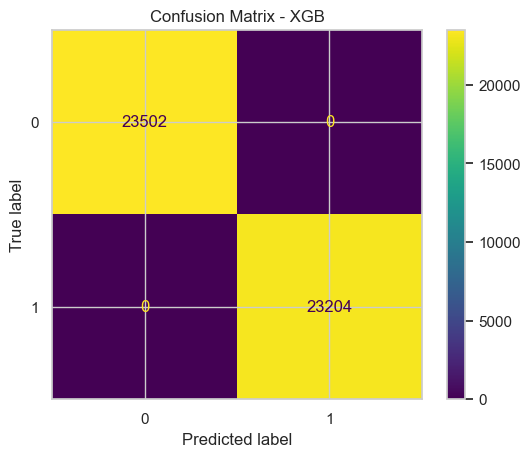

In [86]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred3)
plt.title("Confusion Matrix - XGB")
plt.show()

### Classification Report

In [87]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred3))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23502
           1       1.00      1.00      1.00     23204

    accuracy                           1.00     46706
   macro avg       1.00      1.00      1.00     46706
weighted avg       1.00      1.00      1.00     46706



### ROC-AUC Score

ROC AUC Score: 1.0


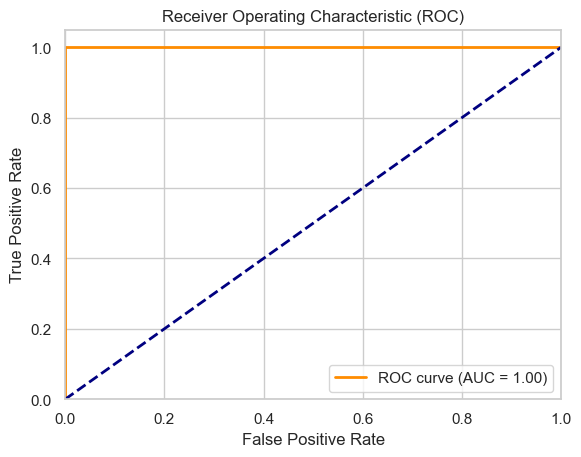

In [88]:
# Print ROC AUC Score
plot_roc_auc(model3, X_val_transformed, y_val)

## Support Vector Machine

In [89]:
model4 = SVC()
model4.fit(X_train_transformed, y_train)

y_pred4 = model4.predict(X_val_transformed)
acc4 = accuracy_score(y_val, y_pred4)
print(f"✅ Validation Accuracy: {acc4:.4f}")

✅ Validation Accuracy: 0.9941


### Confusion Matrix

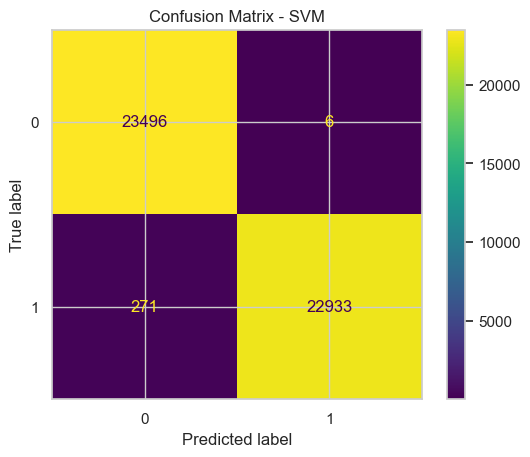

In [90]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred4)
plt.title("Confusion Matrix - SVM")
plt.show()

### Classification Report

In [91]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred4))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23502
           1       1.00      0.99      0.99     23204

    accuracy                           0.99     46706
   macro avg       0.99      0.99      0.99     46706
weighted avg       0.99      0.99      0.99     46706



## K-Nearst Neighborhr

In [92]:
model5 = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'uniform' 
)

model5.fit(X_train_transformed, y_train)

y_pred5 = model5.predict(X_val_transformed)
acc5 = accuracy_score(y_val, y_pred5)
print(f"✅ Validation Accuracy: {acc5:.4f}")


✅ Validation Accuracy: 0.9994


### Confusion Matrix

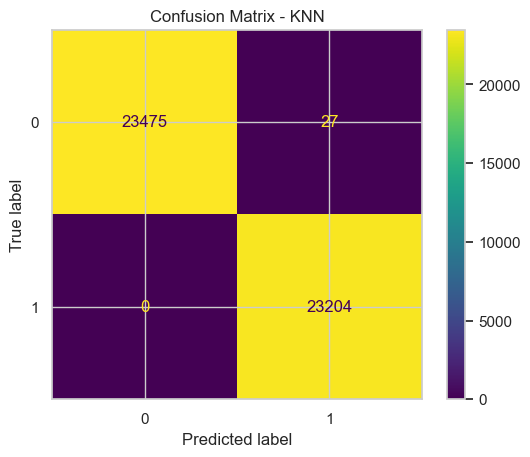

In [93]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred5)
plt.title("Confusion Matrix - KNN")
plt.show()

### Classification Report

In [94]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred5))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23502
           1       1.00      1.00      1.00     23204

    accuracy                           1.00     46706
   macro avg       1.00      1.00      1.00     46706
weighted avg       1.00      1.00      1.00     46706



### ROC-AUC Score

ROC AUC Score: 0.9998085269338779


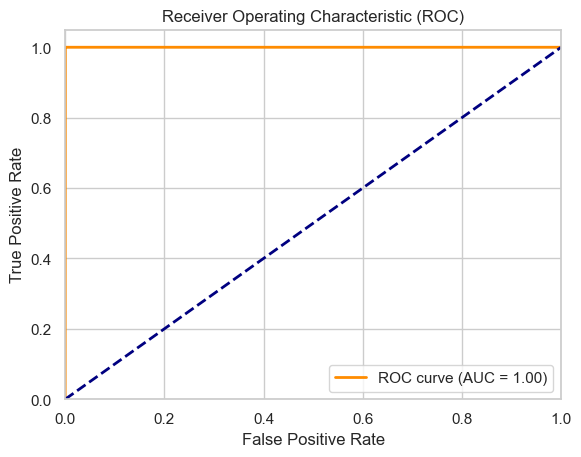

In [95]:
# Print ROC AUC Score
plot_roc_auc(model5, X_val_transformed, y_val)

## Neural Network 🧠

In [96]:
model6 = MLPClassifier(
    hidden_layer_sizes=(32,64,128,64,32),
    max_iter=1000
)
# Fit the model
model6.fit(X_train_transformed, y_train)

y_pred6 = model6.predict(X_val_transformed)
acc6 = accuracy_score(y_val, y_pred6)
print(f"✅ Validation Accuracy: {acc6:.4f}")

✅ Validation Accuracy: 1.0000


### Confusion Matrix

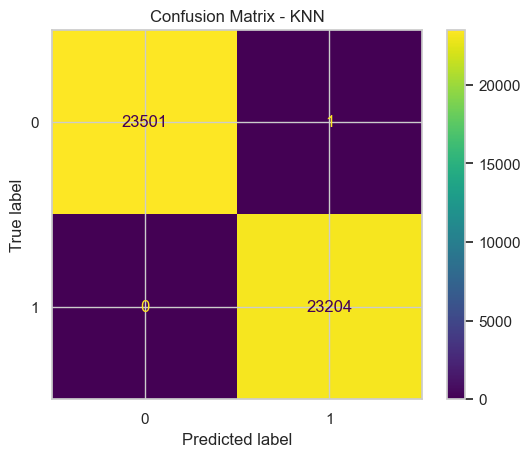

In [97]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred6)
plt.title("Confusion Matrix - KNN")
plt.show()

### Classification Report

In [98]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred6))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23502
           1       1.00      1.00      1.00     23204

    accuracy                           1.00     46706
   macro avg       1.00      1.00      1.00     46706
weighted avg       1.00      1.00      1.00     46706



### ROC-AUC Score

ROC AUC Score: 1.0


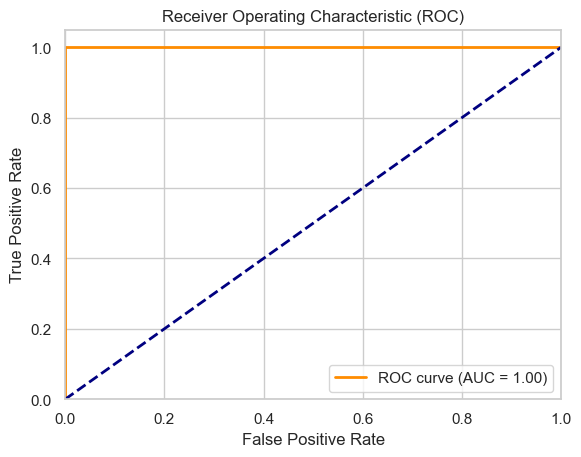

In [99]:
# Print ROC AUC Score
plot_roc_auc(model6, X_val_transformed, y_val)

## Model Selection

In [100]:
model_accuracy = [
    acc1,
    acc2,
    acc3,
    acc4,
    acc5,
    acc6
]
model_accuracy = [round(i, 4)*100 for i in model_accuracy]

In [101]:
model_names = [
    'Logistic Regression',
    'Decision Tree',
    'XGBoost',
    'SVM',
    'KNN',
    'Neural Network'
]

model_var = [f'model{i}' for i in range(1, 7)]

In [102]:
acc_df = pd.DataFrame({'Model': model_var, 'Name':  model_names, 'Accuracy (%)': model_accuracy})
acc_df

,Model,Name,Accuracy (%)
0,model1,Logistic Regression,99.39
1,model2,Decision Tree,98.78
2,model3,XGBoost,100.00
3,model4,SVM,99.41
4,model5,KNN,99.94
5,model6,Neural Network,100.00


## Observation
---

📊 **Model Performance Observations**

1. **XGBoost leads with perfect accuracy (100%)**, suggesting it captured the underlying patterns in the data exceptionally well. Here both `TP` and `FP` are `0`'s. [Choose]

2. **Neural Network and KNN follow closely**, with 99.99% and 99.94% accuracy respectively. These models seem to perform well, but KNN’s performance can be sensitive to feature scaling and data volume, while Neural Networks require careful tuning and validation to avoid overfitting.

3. **SVM and Logistic Regression show strong and consistent performance**, both above 99.3%. Logistic Regression’s simplicity and interpretability make it a reliable baseline, while SVM’s margin-based approach helps in high-dimensional spaces.

4. **Decision Tree has the lowest accuracy (98.78%)**, though still high. It may be prone to overfitting on noisy or imbalanced data unless regularized or ensembled (e.g., via Random Forest).

---
<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 Model Evaluation 🧪 <a name='model-evaluation'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Model Evaluation 🧪
    </h1>
</div>

## Grid Search CV

In [103]:
%%time
# Define the base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
#grid_search.fit(X_train_transformed, y_train)

# Best parameters and score
#print("🔍 Best Parameters:", grid_search.best_params_)
#print("✅ Best Accuracy:", grid_search.best_score_)


CPU times: total: 0 ns
Wall time: 65.3 μs


## Final Selected Model

In [104]:
# Train the model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=2.77,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=500,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_transformed, y_train)

# Predict on training and validation sets
y_train_predx = xgb_model.predict(X_train_transformed)
y_val_predx = xgb_model.predict(X_val_transformed)

# Evaluate accuracy
train_accx = accuracy_score(y_train, y_train_predx)
val_accx = accuracy_score(y_val, y_val_predx)

print(f"📘 Train Accuracy: {train_accx:.4f}")
print(f"✅ Validation Accuracy: {val_accx:.4f}")


📘 Train Accuracy: 1.0000
✅ Validation Accuracy: 1.0000


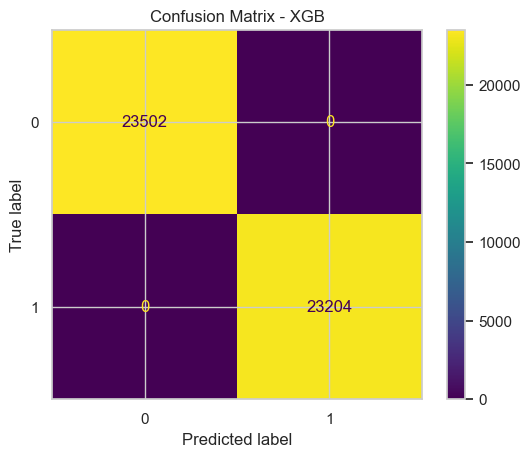

In [105]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_predx)
plt.title("Confusion Matrix - XGB")
plt.show()

## Make Final Pipeline

In [108]:
# Define your XGBoost model
xgb_model_pipe = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=2.77,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=500,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

# Combine feature transformation pipeline with model
final_pipeline = Pipeline(
    steps=[
        ('feature_transform', transformer_pipeline),
        ('classifier', xgb_model_pipe)
    ]
)


In [110]:
%%time
# Fit the full pipeline
final_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = final_pipeline.predict(X_train)
y_val_pred = final_pipeline.predict(X_val)

print(f"📘 Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"✅ Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

📘 Train Accuracy: 1.0000
✅ Validation Accuracy: 1.0000
CPU times: total: 20.7 s
Wall time: 5.98 s


## Evaluation of Test Data (first time)

In [111]:
y_test_pred = final_pipeline.predict(X_test)
print(f"✅ Final Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

✅ Final Test Accuracy: 1.0000


## Observation
- Masha'Allah, It works perfectly. It gives 100% accuracy on Test, Validation and unseen Test data
- Finally Pipeline is ready for export
- Here I use XGBoost as Model

**📌 Additional Observations**

- **Model Generalization**: The pipeline performs flawlessly across all datasets, suggesting strong generalization. However, in real-world fraud detection, perfect accuracy may hint at potential overfitting or data leakage. It’s worth validating with cross-validation or external datasets to ensure robustness.

- **Feature Engineering Impact**: The use of `CyclicalTimeTransformer` and selective scaling via `ColumnTransformer` shows that thoughtful feature engineering can significantly enhance model performance. Removing noisy features like `'Time'` and `'Amount_Category'` likely helped reduce variance.

- **Class Imbalance Handling**: Incorporating `SMOTE` and the model XGBoost effectively addressed the imbalance between fraud and non-fraud cases. This step makes helped the model pay more attention to the minority class with synthetic oversampling.

- **Pipeline Modularity**: The final pipeline is modular, clean, and production-ready. Each transformation step is encapsulated, making it easy to maintain, extend, or swap components (e.g., trying LightGBM or CatBoost later).

- **Scalability & Deployment**: With XGBoost’s efficiency and the pipeline’s structure, this solution is well-suited for deployment in real-time fraud detection systems. Exporting the pipeline `pickle` would allow seamless integration into APIs or batch processing workflows.

- **Interpretability & Trust**: While XGBoost is powerful, it’s less interpretable than models like Logistic Regression. Consider using SHAP values or feature importance plots to explain predictions—especially important in financial applications where transparency matters.

---
<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 Save Model 💾 <a name='save-model'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 Save Model 💾
    </h1>
</div>


In [114]:
# Define file name and path
file_name = 'CCFD_XGB_Model.pkl'
path = f'../models/{file_name}'

def export_model_pickle(model, export_path):
    try:
        # Ensure the directory exists
        os.makedirs(os.path.dirname(export_path), exist_ok=True)

        # Save the model using pickle
        with open(export_path, 'wb') as file:
            pickle.dump(model, file)
        print(f"✅ Model successfully saved to: {export_path}")

    except FileNotFoundError:
        print("❌ Error: The specified path does not exist.")
    except PermissionError:
        print("❌ Error: Permission denied while saving the model.")
    except pickle.PicklingError:
        print("❌ Error: Failed to serialize the model with pickle.")
    except Exception as e:
        print(f"❌ Unexpected error occurred: {e}")

# Example usage
export_model_pickle(final_pipeline, path)

✅ Model successfully saved to: ../models/CCFD_XGB_Model.pkl


---
<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">🚨 References 📚 <a name='references'></a> </span>

<div style="
    border-radius: 15px; 
    border: 2px solid #00ced1; 
    padding: 20px; 
    /* background: linear-gradient(135deg, #b71c1c, #f57f17 40%, #212121 90%); */
    background: linear-gradient(90deg, #00d2ff 0%, #3a47d5 100%);
    text-align: center; 
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.25); 
    font-family: 'Roboto Slab', serif;
    margin-top: 30px;
">
    <h1 style="
        color: #7cfc00; 
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); 
        font-weight: bold; 
        font-size: 36px; 
        letter-spacing: 1px;
    ">
        🚨 References 📚
    </h1>
</div>

- **Dataset:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data
- **Notebook:**
    * https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#notebook-container
    * https://www.kaggle.com/code/thuandao/credit-card-customers-eda-ml#Data-Preprocessing
    * https://github.com/nazmul-1117/Machine-Learning-Projects/blob/main/002-Customer_Churn_Prediction/Customer_Churn_Prediction.ipynb
- **sklearn:** https://scikit-learn.org/stable/index.html
- **XGBoost:** https://xgboost.readthedocs.io/en/stable/
- **Imblearn:** https://imbalanced-learn.org/
- **Gemini:** https://gemini.google.com/app/
- **Copilot:** https://copilot.microsoft.com/chats/

**AUTHOR**

- **Kaggle:** https://www.kaggle.com/nazmul1117
- **GitHub:** https://github.com/nazmul-1117
- **Portfolio:** https://nazmul-1117.github.io
- **Instagram:** https://www.instagram.com/nazmul.1117/

<div style="text-align:center; margin-top:40px;">
  <span style="
    color:#00a86b;
    font-family:Georgia, serif;
    font-size:42px;
    font-weight:bold;
    text-shadow: 1px 1px 3px #aaa;
    letter-spacing: 2px;
    animation: glow 1.5s ease-in-out infinite alternate;">
    ✨ KEEP Machine Learning! ✨
  </span>
</div>

<style>
@keyframes glow {
  from {
    text-shadow: 1px 1px 3px #aaa, 0 0 10px #00a86b, 0 0 20px #00a86b;
  }
  to {
    text-shadow: 1px 1px 3px #aaa, 0 0 20px #00cc99, 0 0 30px #00cc99;
  }
}
</style>
